<a href="https://colab.research.google.com/github/IsadoraPrevitalle/DetectandoFraudesEmCartaoDeCredito/blob/main/TARGETECH_Fraudes_cartao_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRINT IV**

Integrantes - Isadora Alves, Aline Rocha e Willian Martins
\
\
TargeTech - Esse projeto possui o objetivo de verificar transações fraudulentas e, com bases nelas desenvolver um modelo de classificação a fim de detectar possiveis fraudes durantes movimentações em sites de compras. Garantindo maior  segurança para o consumidor e empresa.

**ETAPA 1 - PRÉ-PROCESSAMENTO DE DADOS**

Incialmente foi realizado a importação das bibliotecas Pandas para manipulação e analise de DataFrame, Numpy para manipulação de arrays, Seaborn e Matplotlib para visualização de dados e scikit-learn para aprendizado de maquina

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [ ]:
#Vericando dataset com a funçaõ read do pandas
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Com base em algumas verificações é possivel anaisar os tipos das colunas contidas no dataset, a existencia de valores nulos e a quantidade total de registros

In [ ]:
#Analisando informações como tipo quantidade de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Verificando nulos
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#Analisando a coorelação entre a coluna "Class" com as demais colunas do dataset
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [ ]:
#Vericando a coorelação de todas as colunas do dataset
df.corr(method='spearman')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.190647,-0.006419,-0.473348,-0.142156,0.226004,-0.111408,0.116722,-0.103882,0.017986,...,0.096564,0.132651,0.148505,-0.015980,-0.259220,0.000132,-0.035063,-0.143200,-0.040007,-0.011692
V1,0.190647,1.000000,-0.384328,-0.412095,0.101011,-0.106632,-0.086561,-0.227650,-0.236140,0.138614,...,-0.061958,-0.028827,0.145440,-0.000315,0.049291,0.006380,-0.104815,-0.207967,-0.086663,-0.042424
V2,-0.006419,-0.384328,1.000000,0.073967,0.155042,0.342701,-0.110393,0.426320,0.006980,-0.077880,...,-0.098255,-0.056478,-0.094982,0.012617,-0.085682,0.033865,0.129234,0.137976,-0.502052,0.051062
V3,-0.473348,-0.412095,0.073967,1.000000,0.060812,-0.223849,0.171263,-0.074582,0.164374,-0.030876,...,-0.040234,0.004404,-0.140076,-0.000559,0.031854,-0.016689,0.140724,0.180169,-0.000236,-0.059278
V4,-0.142156,0.101011,0.155042,0.060812,1.000000,0.021367,0.075185,0.059920,-0.009608,0.105248,...,0.038960,-0.004931,0.009615,-0.008782,0.060647,-0.064357,-0.033634,0.004757,-0.022117,0.063045
V5,0.226004,-0.106632,0.342701,-0.223849,0.021367,1.000000,-0.007577,0.431573,-0.057022,-0.056580,...,-0.040364,-0.010920,-0.108300,-0.023076,-0.015618,0.029513,0.012883,-0.027806,-0.314061,-0.030147
V6,-0.111408,-0.086561,-0.110393,0.171263,0.075185,-0.007577,1.000000,-0.292680,0.444053,0.028864,...,0.034595,0.040370,-0.050293,-0.135166,-0.011131,-0.023932,0.073772,0.020459,0.205452,-0.038410
V7,0.116722,-0.227650,0.426320,-0.074582,0.059920,0.431573,-0.292680,1.000000,-0.389213,-0.100252,...,-0.022250,-0.023750,-0.186343,-0.012879,-0.046468,0.016724,-0.094494,0.056405,-0.030003,-0.048308
V8,-0.103882,-0.236140,0.006980,0.164374,-0.009608,-0.057022,0.444053,-0.389213,1.000000,-0.002511,...,0.076569,0.019775,0.075212,-0.024536,-0.074303,-0.007648,0.189916,0.089700,0.004371,0.022706
V9,0.017986,0.138614,-0.077880,-0.030876,0.105248,-0.056580,0.028864,-0.100252,-0.002511,1.000000,...,-0.065773,0.001958,0.074164,-0.001572,-0.022575,0.026677,-0.001804,-0.103743,-0.077437,-0.049499


In [ ]:
#Avaliando métricas de percentis, média e desvio padrão a fim de verificar dados inconsistentes
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Ainda na etapa de processamento é verificado que os dados do dataset estão desiguais para treinar um modelo de aprendizado de maquina, por essa razão é realizado um processo de balanceamento de classes a fim de manter uma mesma quantidade de registros tanto para fraude quanto para não fraude.

In [ ]:
#Avaliando métricas com dados que não foram classificados como fraudes
df_Nfraude = df.Amount[df.Class == 0]
df_Nfraude.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
#Avaliando métricas com dados que foram classificados como fraudes
df_SFraude = df.Amount[df.Class == 1]
df_SFraude.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#Criando um novo dataframe com todos os dados classificados como fraude
df_Fraude = df[df.Class == 1]
df_Fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
#Criando um novo dataframe com todos os dados classificados como não fraude
df_nao_fraude = df[df.Class == 0]
df_nao_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#Criando um novo dataframe para igualar fraudes e não fraudes
df_nao_fraude = df_nao_fraude.sample(492)
df_nao_fraude

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88519,62174.0,-4.951991,-6.219920,1.184671,-0.321758,2.094200,-2.840566,-2.758695,0.929381,-0.104757,...,0.828851,0.137540,0.454423,0.430197,-0.666575,-0.736585,0.118022,-0.724240,176.93,0
200928,133643.0,-2.080035,1.756121,-1.834406,-1.083736,-1.530746,0.071467,2.204859,0.419002,-0.151448,...,-0.262047,-0.191702,-0.251197,-0.648231,0.148907,-0.090459,0.227717,-0.302581,389.00,0
203429,134813.0,-1.083670,0.143245,2.339141,1.504218,0.756779,0.459225,-0.292890,0.324416,-1.594724,...,0.242507,0.512431,-0.244281,-0.242064,0.058539,2.621522,-0.123477,0.047259,23.84,0
145466,86973.0,-0.826875,0.633387,1.677595,-0.310517,0.467274,-0.695738,0.784451,-0.147211,-0.311738,...,0.089218,0.289221,-0.367555,0.091105,0.741097,-0.140470,0.043344,0.071183,30.86,0
84004,60123.0,1.403921,-0.257031,-0.202567,-0.716981,-0.346543,-0.902632,-0.027748,-0.335461,-1.326464,...,0.231637,0.689496,-0.149055,0.160266,0.757833,-0.059580,-0.005333,0.001257,15.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145438,86944.0,-0.426382,-0.200736,1.695595,-0.990219,0.673535,0.693035,0.495616,-0.564670,1.551274,...,-0.023700,0.581694,0.122135,0.271171,-1.497671,0.009888,-0.977890,-0.570808,6.99,0
85980,61028.0,-0.162717,-0.413915,0.955835,-2.008661,-0.816780,-0.376908,0.261608,-0.053868,-0.845128,...,-0.126412,-0.127613,0.121185,-0.433193,-0.389089,1.375730,-0.074849,0.026554,113.64,0
29934,35704.0,-1.528058,-1.694618,0.885920,-1.595738,1.781465,-1.096435,-0.364016,-0.178322,-1.061515,...,0.201225,0.423241,-0.291086,-0.669549,0.723022,-0.213787,-0.426569,0.034477,36.00,0
129161,78976.0,1.105012,0.062737,0.331346,0.676816,-0.574420,-0.877768,-0.034601,-0.009654,-0.053295,...,-0.208028,-0.810130,0.114884,0.462918,0.097925,0.063492,-0.044087,0.028355,49.99,0


In [ ]:
#comcatenado os dois dataframe
df_reg = pd.concat([df_nao_fraude, df_Fraude], axis = 0)
df_reg

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88519,62174.0,-4.951991,-6.219920,1.184671,-0.321758,2.094200,-2.840566,-2.758695,0.929381,-0.104757,...,0.828851,0.137540,0.454423,0.430197,-0.666575,-0.736585,0.118022,-0.724240,176.93,0
200928,133643.0,-2.080035,1.756121,-1.834406,-1.083736,-1.530746,0.071467,2.204859,0.419002,-0.151448,...,-0.262047,-0.191702,-0.251197,-0.648231,0.148907,-0.090459,0.227717,-0.302581,389.00,0
203429,134813.0,-1.083670,0.143245,2.339141,1.504218,0.756779,0.459225,-0.292890,0.324416,-1.594724,...,0.242507,0.512431,-0.244281,-0.242064,0.058539,2.621522,-0.123477,0.047259,23.84,0
145466,86973.0,-0.826875,0.633387,1.677595,-0.310517,0.467274,-0.695738,0.784451,-0.147211,-0.311738,...,0.089218,0.289221,-0.367555,0.091105,0.741097,-0.140470,0.043344,0.071183,30.86,0
84004,60123.0,1.403921,-0.257031,-0.202567,-0.716981,-0.346543,-0.902632,-0.027748,-0.335461,-1.326464,...,0.231637,0.689496,-0.149055,0.160266,0.757833,-0.059580,-0.005333,0.001257,15.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
#Organizando index
df_reg.reset_index(inplace = True)
df_reg

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,88519,62174.0,-4.951991,-6.219920,1.184671,-0.321758,2.094200,-2.840566,-2.758695,0.929381,...,0.828851,0.137540,0.454423,0.430197,-0.666575,-0.736585,0.118022,-0.724240,176.93,0
1,200928,133643.0,-2.080035,1.756121,-1.834406,-1.083736,-1.530746,0.071467,2.204859,0.419002,...,-0.262047,-0.191702,-0.251197,-0.648231,0.148907,-0.090459,0.227717,-0.302581,389.00,0
2,203429,134813.0,-1.083670,0.143245,2.339141,1.504218,0.756779,0.459225,-0.292890,0.324416,...,0.242507,0.512431,-0.244281,-0.242064,0.058539,2.621522,-0.123477,0.047259,23.84,0
3,145466,86973.0,-0.826875,0.633387,1.677595,-0.310517,0.467274,-0.695738,0.784451,-0.147211,...,0.089218,0.289221,-0.367555,0.091105,0.741097,-0.140470,0.043344,0.071183,30.86,0
4,84004,60123.0,1.403921,-0.257031,-0.202567,-0.716981,-0.346543,-0.902632,-0.027748,-0.335461,...,0.231637,0.689496,-0.149055,0.160266,0.757833,-0.059580,-0.005333,0.001257,15.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


ETAPA 2 - TREINAMENTO DO MODELO

Com o pré-processamento finalizado, nessa etapa é realizado o treinamento do algoritmo LogisticRegression, voltado para classificação binária

In [ ]:
#Criando dados de validação para o modelo
#Foi extraido 20 dados, onde 10 são fraudes e 10 não são, para validar como o modelo irá prever ao ser aplicado
df_valNFraude = df_reg.head(10)
df_valFraude = df_reg.tail(10)

df_valFraude

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
974,274382,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,...,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1
975,274475,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,...,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
976,275992,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
977,276071,166883.0,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1
978,276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
979,279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
983,281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
#Retitando linhas de validação do dataframe que será passado para a LogisticRegression
df_reg = df_reg.iloc[10:]
df_reg = df_reg.iloc[:-10]

df_reg


,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10,209261,137484.0,1.806560,-0.743833,-0.273181,0.196711,-0.902566,-0.300273,-0.658317,0.073719,...,0.283216,0.894493,0.082150,0.065637,-0.250498,0.098435,0.003179,-0.040060,74.95,0
11,140239,83611.0,0.588267,-1.419158,0.793132,0.256085,-1.147279,0.938415,-0.671384,0.495452,...,0.011626,-0.320702,-0.078759,-0.226386,-0.183404,0.961659,-0.061865,0.038695,263.12,0
12,74834,55779.0,-2.477931,-0.795925,0.833956,-2.798733,0.134036,-2.047258,0.152797,0.082475,...,-0.109910,-0.357836,-0.724710,0.466633,0.676763,-1.055070,-0.152617,-0.145056,57.01,0
13,271070,164397.0,-1.365465,-1.516710,-0.672465,0.033546,1.699432,-1.572138,-0.687765,0.418781,...,0.370844,0.418855,-0.005112,0.766170,-0.404724,0.559739,-0.107378,-0.402951,9.95,0
14,63424,50707.0,0.778476,-1.134131,0.682950,0.381355,-0.500164,2.018192,-0.961154,0.656346,...,0.021699,0.494655,-0.071912,-1.011730,0.134800,-0.128237,0.119124,0.035866,158.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,263274,160870.0,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,...,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77,1
970,263324,160895.0,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14,1
971,263877,161154.0,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,...,1.043587,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,0.38,1
972,268375,163181.0,-5.238808,0.623013,-5.784507,1.678889,-0.364432,-0.477295,-4.276132,-0.695173,...,-0.326140,1.509239,-0.215966,-0.245727,0.893041,0.865758,0.854657,-0.964482,39.98,1


In [ ]:
#Separando dados de validação e suas classes a fim de testar o modelo
df_validacao = pd.concat([df_valNFraude, df_valFraude])
df_validacao.reset_index(inplace = True)
df_validacao_Classe = df_validacao.Class
df_validacao = df_validacao.drop(['Time', 'Class', 'index', 'level_0'], axis = 1)
df_validacao_Classe

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: Class, dtype: int64

In [ ]:
#Verificando se os classes continuam normalizadas
df_reg.Class.value_counts()

0    482
1    482
Name: Class, dtype: int64

In [ ]:
#Separando dados para iniciar o processo de treinamento do algorito
X = df_reg.drop(['index', 'Time', 'Class'], axis=1)
Y = df_reg['Class']

In [ ]:
print(X,Y)

           V1        V2        V3        V4        V5        V6        V7  \
10   0.192732 -2.468676  1.217845  0.734072 -2.209931  1.003328 -0.950311   
11  -0.602381 -0.962378  0.575182 -2.474866 -0.846993 -0.387868 -0.932352   
12  -0.334987  0.961159  1.657418  0.649008  0.111921 -0.775916  0.711463   
13   1.281440 -0.588436  0.076483 -0.892918 -0.556946 -0.252167 -0.426539   
14  -0.566950  1.476539 -0.292537 -0.907896  1.665750 -1.041197  1.970088   
..        ...       ...       ...       ...       ...       ...       ...   
969 -0.644278  5.002352 -8.252739  7.756915 -0.216267 -2.751496 -3.358857   
970 -0.848290  2.719882 -6.199070  3.044437 -3.301910 -1.992117 -3.734902   
971 -3.387601  3.977881 -6.978585  1.657766 -1.100500 -3.599487 -3.686651   
972 -5.238808  0.623013 -5.784507  1.678889 -0.364432 -0.477295 -4.276132   
973 -7.503926 -0.360628 -3.830952  2.486103  2.497367  1.332437 -6.783964   

            V8        V9       V10  ...       V20       V21       V22  \
10

In [ ]:
#Separação entre dados de treino e teste, com uma validação de 35% da base
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.35, random_state=18, stratify=Y)

ETAPA 3 - TESTANDO E AVALIANDO O MODELO DE CLASSIFICAÇÃO

Nessa etapa é utilizada métricas de validação como acurácia, matriz de confusão, recall, precisão e F1-Score a fim de verificar o quão bem o modelo se sai para dados desconhecidos

In [ ]:
# Treinamento do modelo e, verificação de sua acurácia

lr = LogisticRegression(max_iter=1500)
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)
acc = accuracy_score(Y_test, pred)
print('Acurácia: ',acc*100)

Acurácia:  94.67455621301775


In [ ]:
# Testes no modelo com os 20 dados que haviam sido separados
pred = lr.predict(df_validacao)

df_avaliacao = pd.DataFrame({'real': df_validacao_Classe, 'previsão': pred})
df_avaliacao


,real,previsão
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


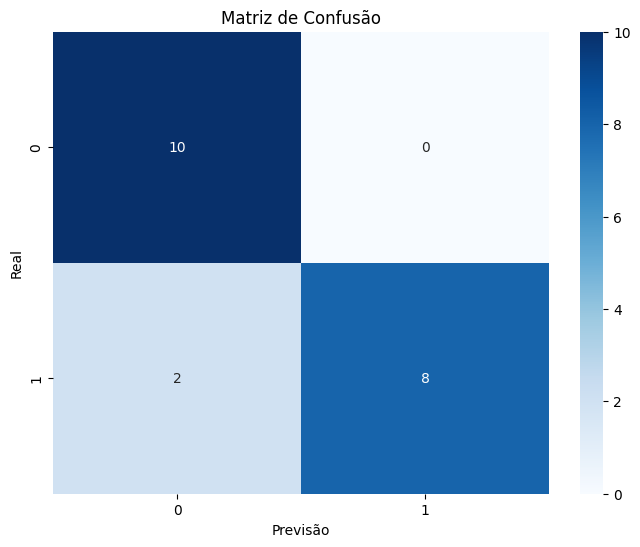

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



In [ ]:
pred = df_avaliacao['previsão']
df_validacao_Classe = df_avaliacao['real']

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(df_validacao_Classe, pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Calculando e exibindo as métricas de avaliação
report = classification_report(df_validacao_Classe, pred)
print(report)


ETAPA 4 - VISUALIZAÇÃO DE DADOS

Nessa etapa é realizado a exibição de informações relevantes que foram possivel extrair do processo de analise e estruturação do um modelo de regressão.
Essa exibição é realizada atrravés de diversos gráficos intuitivos

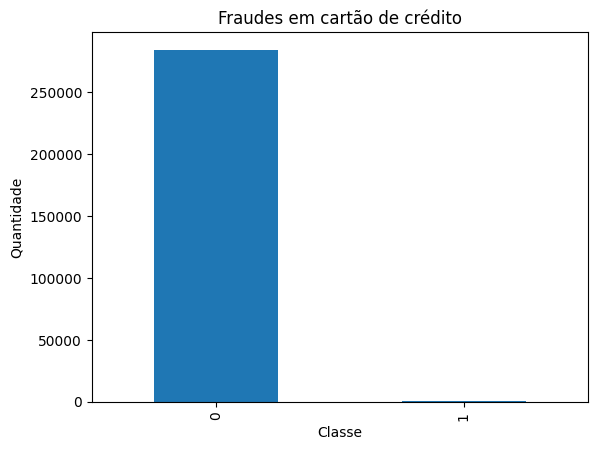

In [ ]:
# Plotando um gráfico de barras que verifica a quantide de dados fraudulentos
value_counts = df['Class'].value_counts()

value_counts.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Fraudes em cartão de crédito')
plt.show()

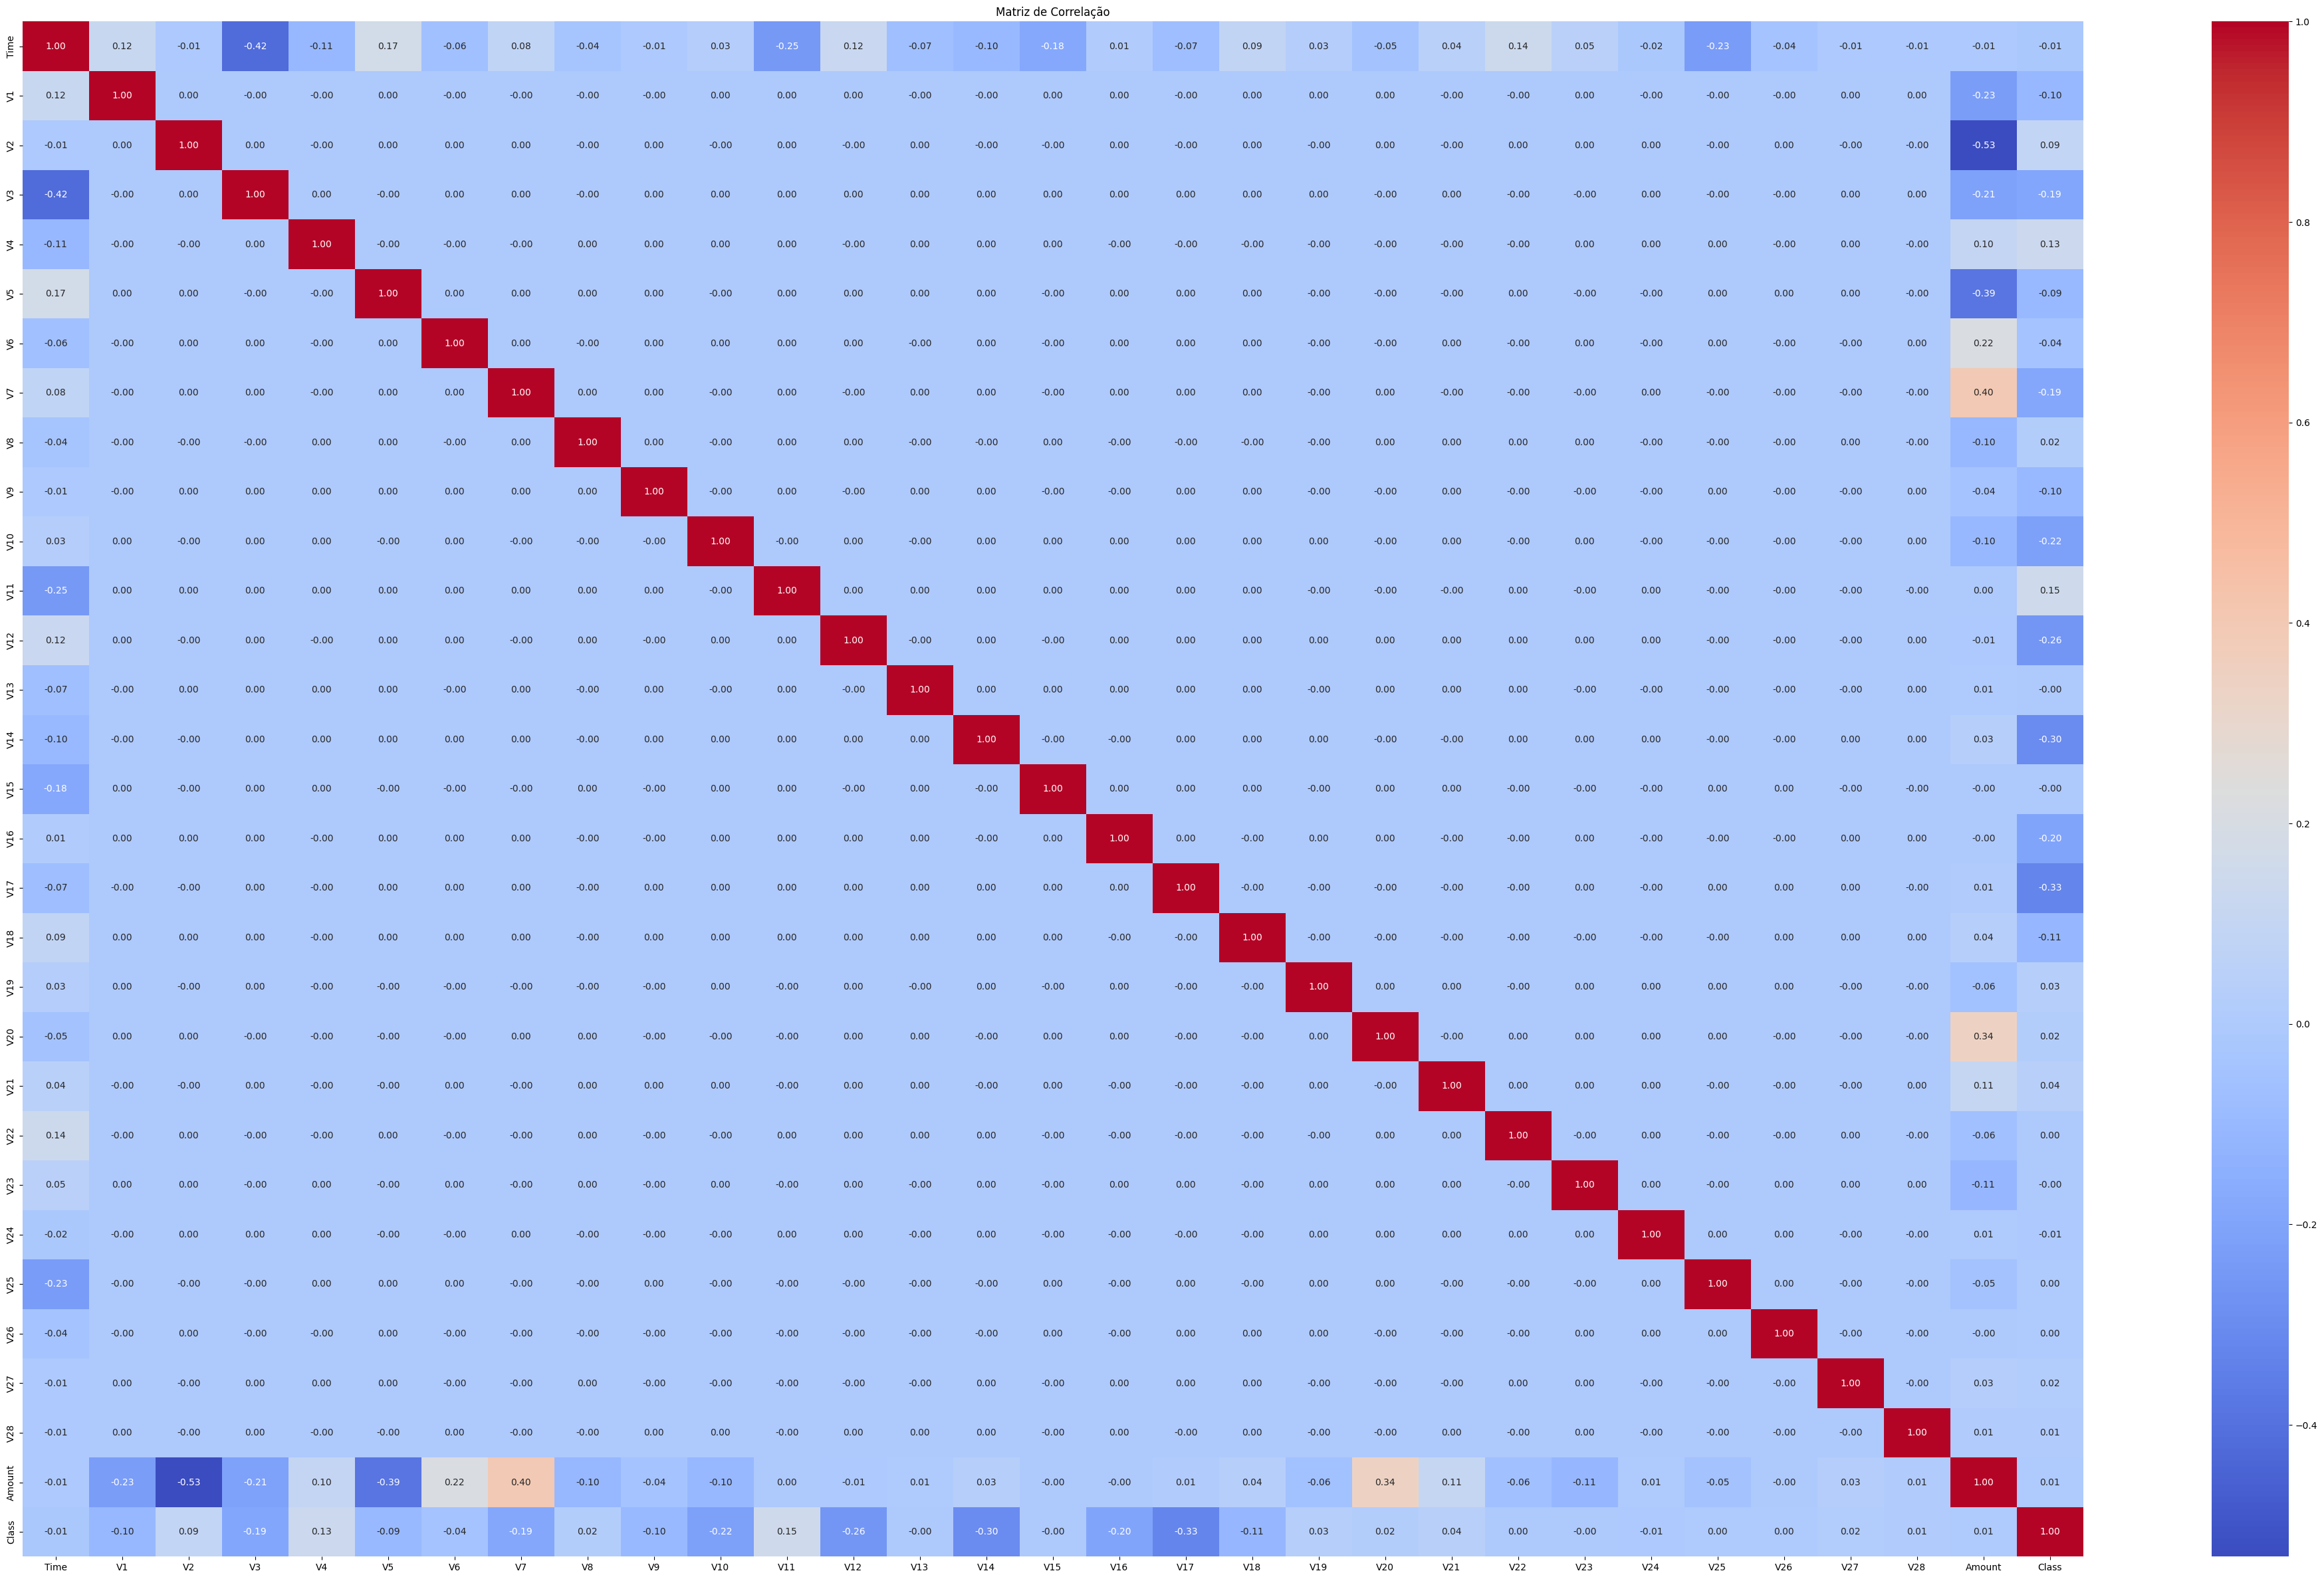

In [ ]:
# Plotando a matriz de correlação
correlation_matrix = df.corr()

plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

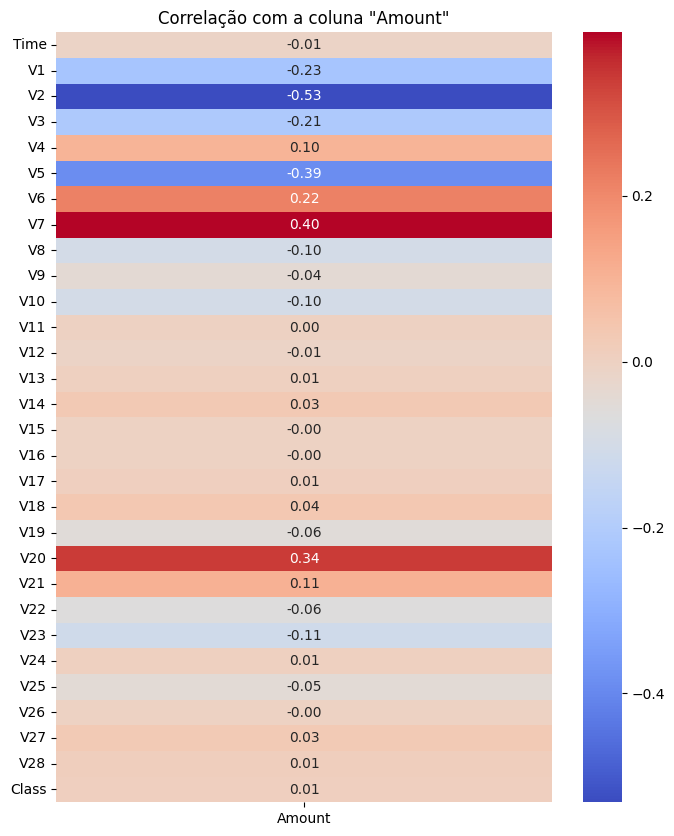

In [ ]:
# Plotando um mapa de calor da correlação apenas para a coluna 'Class' com as outras colunas
correlation_with_class = df.corr()['Class'].to_frame()

plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_class.drop('Class'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação com a coluna "Class"')
plt.show()


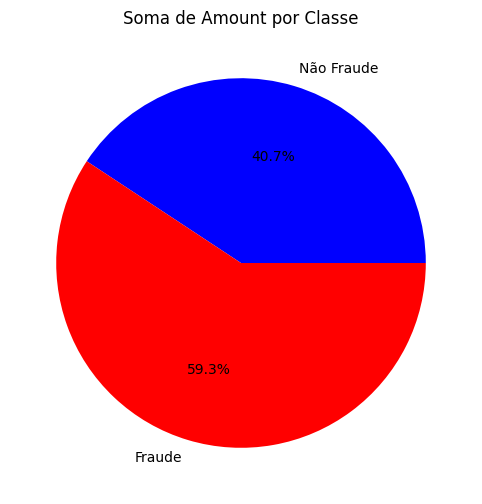

In [ ]:
# Plotando o gráfico de pizza com as somas de 'Amount' por classe
soma_por_classe = df_reg.groupby('Class')['Amount'].sum()

soma_por_classe.index = ['Não Fraude', 'Fraude']

plt.figure(figsize=(8, 6))
plt.pie(soma_por_classe, labels=soma_por_classe.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Soma de Amount por Classe')
plt.show()


<Axes: xlabel='Class', ylabel='Amount'>

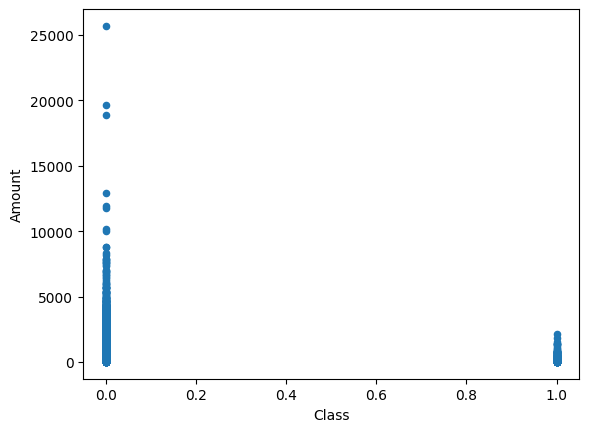

In [ ]:
# Plotando graficos de dispersão entre Class e Amount
df.plot.scatter(x='Class', y='Amount')

<Axes: xlabel='Time', ylabel='Amount'>

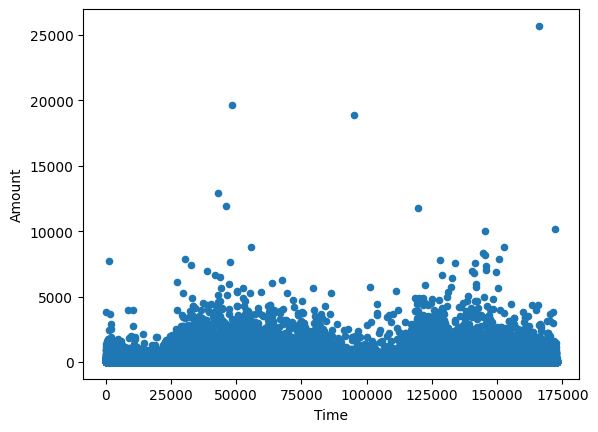

In [ ]:
# Plotando graficos de dispersão entre Time e Amount
df.plot.scatter(x='Time', y='Amount')